# Содержание

1. [Изучение и предобработка данных](#info_id)
    - [Вывод](#one_end)
2. [Исследование рынка объектов общепита](#research)   
3. [Общий вывод](#fin)
4. [Презентация](#presentation)

<a id='info_id'></a>
## Изучение и предобработка данных
***
**to do:**
1. Импортируем необходимые библиотеки
2. Прочитаем данные
3. Проверим:
    - пропуски;
    - дубликаты;
    - не соответствие типов данных;
4. Выполним предобработку данных;    
5. Сделаем вывод.


In [ ]:
# Основные библиотеки
import pandas as pd
import numpy as np
import scipy.stats as stats
import datetime as dt

# Библиотеки визуализации
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Библиотека регулярных выражений на python
import re

# Дополнительные библиотеки
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import os

**Изучение данных**

In [ ]:
df_rest_data.head(15)

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корп...",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строе...",120


Общая информация о датасете

In [ ]:
df_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null object
address        15366 non-null object
number         15366 non-null int64
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


1. Пропусков нет.  
2. Переведем поле `object_type` в категориальный тип данных. Это нужно в первую очередь для оптимизации памяти.

Изучим также поле `number`


In [ ]:
df_rest_data['number'].describe()

count    15366.000000
mean        59.547182
std         74.736833
min          0.000000
25%         12.000000
50%         40.000000
75%         80.000000
max       1700.000000
Name: number, dtype: float64

И так, есть общепиты в которых нет посадочных мест, а есть общепиты, в которых 1700 посадочных мест.  
Типичным завдением можно считать место с 40 посадочных мест.  
Посмотрим на данные, у которых 0 посадочных мест, необходимо понять что за заведения

In [ ]:
df_rest_data[df_rest_data['number'] == 0].sample(10)

,id,object_name,chain,object_type,address,number
12834,194378,"Бургеры, выпечка",нет,предприятие быстрого обслуживания,"город Москва, Измайловское шоссе, дом 71А",0
14970,214114,Армянский лаваш,нет,кафе,"город Москва, поселение Воскресенское, посёлок...",0
10032,171888,Вьетнамская кухня NGON,нет,кафе,"город Москва, улица Новый Арбат, дом 21",0
10342,184457,ДонерХаус,нет,кафе,"город Москва, Ленинградское шоссе, дом 9, корп...",0
14844,219518,Sushi-Make,нет,предприятие быстрого обслуживания,"город Москва, Ярцевская улица, дом 19",0
15263,211466,Милти,да,предприятие быстрого обслуживания,"город Москва, Ленинградский проспект, дом 31А,...",0
10472,189923,Кофе,нет,предприятие быстрого обслуживания,"город Москва, Сходненская улица, дом 44/17",0
11992,184443,СтардогS,да,кафе,"город Москва, Ленинградское шоссе, дом 9, корп...",0
15280,214241,Милти,да,закусочная,"город Москва, Поречная улица, дом 10",0
13423,195718,Кофе с собой,да,предприятие быстрого обслуживания,"город Москва, улица Мусы Джалиля, дом 20",0


Стало ясно!  
Это точки, которые работают на вынос, без возможности размещения клиента.

Проверим дубликаты.  
Проверку выполним с id объекта, а также без него.

In [ ]:
print('Количество дубликатов: {}'.format(df_rest_data.duplicated().sum()))

Количество дубликатов: 0


Дубликатов нет.

In [ ]:
print('Количество дубликатов: {}'.format(df_rest_data[['object_name', 'chain', 'object_type', 'number', 'address']].duplicated().sum()))

Количество дубликатов: 82


Это может означать что по одному адресу расположено 2 точки, допустим их расположение в торговом или бизнес центре. Как раз id объекта для этого и нужен. Таких точек 82, что составляет 1% всей выборки. Оставим без изменений.


Выполнять какую-либо обработку названий мы не будем.  
На это есть следующие причины:  
1. Названия могут содержать аббревиатуру, таким образом приведение в нижний регистр будет не совсем верным.
2. Названия с 2 или более заглавными буквами *(ПанПан)* или сочетание в названии анлгийских и русских букв - является умышленным, какая-либо обработка будет являться искажением. 


**Предобработка данных**

Изменение типа данных

In [ ]:
df_rest_data['object_type'] = df_rest_data['object_type'].astype('category')
df_rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
id             15366 non-null int64
object_name    15366 non-null object
chain          15366 non-null object
object_type    15366 non-null category
address        15366 non-null object
number         15366 non-null int64
dtypes: category(1), int64(2), object(3)
memory usage: 615.7+ KB


In [ ]:
df_rest_data['object_name'].unique()

array(['СМЕТАНА', 'Родник', 'Кафе «Академия»', ..., 'Бар Мята Lounge',
       'Мята Lounge Октябрьская', 'Кальянная «Мята Lounge»'], dtype=object)

<a id='one_end'></a>
### Вывод
***
По результатам первичного анализа данных:
- Пропусков нет;
- Есть дубликаты, которые означают размещение заведения в одном месте, напримере ТЦ.
- Мы выяснили что есть заведения с очень большим количество мест, а также заведения без почадочных мест - заведеная которые обслуживают на вынос например. Типичным общепитом мы отмечаем те заведения, у которых 40 посадочных мест.
- Произведено приведение типовы данных для оптимизации памяти при работе с данными.
- В анализе будут использоваться исходные названия объектов.

<a id='research'></a>
## Исследование рынка объектов общественного питания
***

**to do:**
1. Определение количества по каждому типу объекта общественного питания;
2. Соотношение сетевых и не сетевых заведений по их количеству;
3. Определение типа объекта, для которого характерно сетевое распространение;
4. Оценка количества посадочных мест для сетевых объектов;
5. Определение Топ-10 улиц по количеству объектов общественного питания;
6. Определение районов Москвы:
    - по самому большому количеству объектов общественного питания;
    - по самому маленькому количеству объектов общественного питания;
7. Оценка распределения количества посадочных мест для улиц с большим количеством объектов.   

**Определение количества по каждому типу объекта общественного питания**

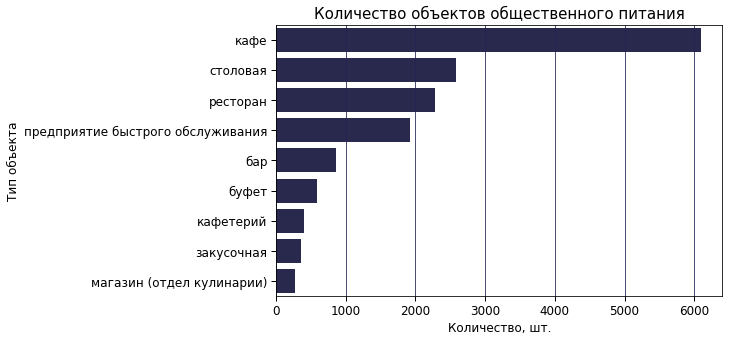

In [ ]:
# Производим сортировку
sort = df_rest_data.groupby('object_type')['id'].count().sort_values(ascending=False).index

# Рисуем график
plt.figure(figsize=(8,5))
ax = sns.countplot(y='object_type', data=df_rest_data, order=sort, color='#222353')
plt.title('Количество объектов общественного питания', fontsize=15)
plt.xlabel('Количество, шт.', fontsize=12)
plt.ylabel('Тип объекта', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)
plt.grid(axis = 'x', color='#222353')
plt.show()

**Вывод**
***
Самые востребованные заведения - "Кафе", таких 6000 среди всех возможных.  
Столовых и ресторанов в 2 раза меньше, их количество приближается к отметке 3000.  
Баров еще меньше - 1000 штук.
И самое наименьшее количество приходится на буфеты, кафетерии, закусочные и магазины. Их до 500 по всей большой Москве.

**Соотношение сетевых и не сетевых объектов**

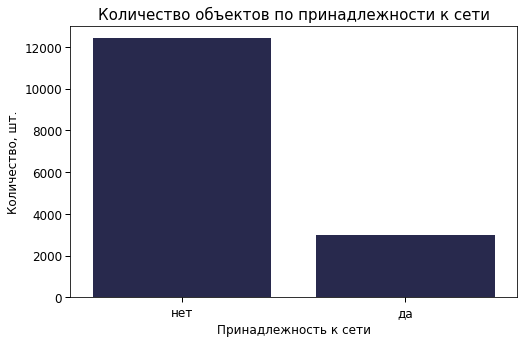

In [ ]:
# Рисуем график
plt.figure(figsize=(8,5))
sns.countplot(x='chain', data=df_rest_data, color='#222353')

# Дополняем подписями, выполняем форматирование осей
plt.title('Количество объектов по принадлежности к сети', fontsize=15)
plt.xlabel('Принадлежность к сети', fontsize=12)
plt.ylabel('Количество, шт.', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)

# Вывод
plt.show()

Не сетевых объектов большое в 6 раз.  
Необходимо понимать распределение в разрезе типа объекта.


**Определение типа объекта, для которого характерно сетевое распространение**

Построим график с подсчетом количества объектов в разрезе признака "Сеть" и "Тип объекта"

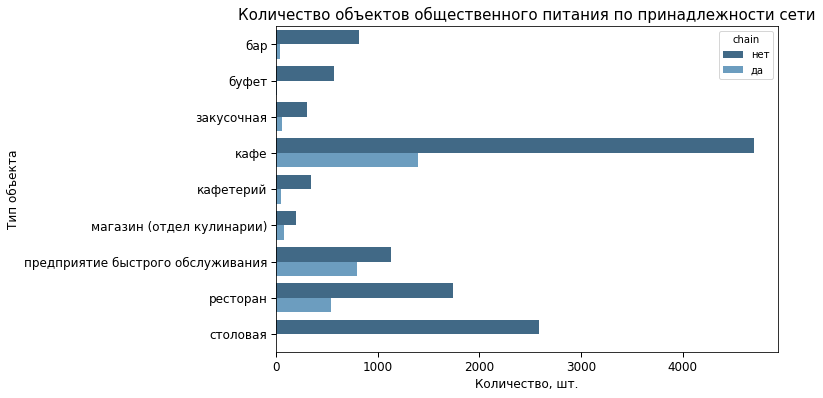

In [ ]:
# Рисуем график
plt.figure(figsize=(9,6))
ax = sns.countplot(y='object_type', hue='chain', data=df_rest_data, palette='Blues_d')

# Подписываем оси, выполняем их форматирование
plt.title('Количество объектов общественного питания по принадлежности сети', fontsize=15)
plt.ylabel('Тип объекта', fontsize=12)
plt.xlabel('Количество, шт.', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)

# Вывод
plt.show()

Для указания точныч величин выполним расчет доли по признаку "Сеть" для каждого типа объекта

In [ ]:
# Расчет количества объектов по каждому типу, в разрезе признака "Сеть"
share_chain_by_type_object = df_rest_data.pivot_table(index='object_type', columns='chain', values='id', aggfunc='count').reset_index()
share_chain_by_type_object.columns = ['object_type', 'yes', 'no']

# Определение доли по признаку "Сеть" для каждого типа объекта
share_chain_by_type_object['total'] = share_chain_by_type_object['yes'] + share_chain_by_type_object['no']
share_chain_by_type_object['share_yes'] = (share_chain_by_type_object['yes'] / share_chain_by_type_object['total'] *100).round()
share_chain_by_type_object['share_no'] = (share_chain_by_type_object['no'] / share_chain_by_type_object['total'] *100).round()

# Вывод
share_chain_by_type_object

,object_type,yes,no,total,share_yes,share_no
0,бар,37,819,856,4.0,96.0
1,буфет,11,574,585,2.0,98.0
2,закусочная,56,304,360,16.0,84.0
3,кафе,1396,4703,6099,23.0,77.0
4,кафетерий,52,346,398,13.0,87.0
5,магазин (отдел кулинарии),78,195,273,29.0,71.0
6,предприятие быстрого обслуживания,791,1132,1923,41.0,59.0
7,ресторан,544,1741,2285,24.0,76.0
8,столовая,3,2584,2587,0.0,100.0


**Вывод**
***
Для каждого типа объекта сетевых заведений меньше чем не сетевых. 

Топ-3 объекта с самой **большой** долей сетевых объектов:
1. Предприятия быстрого обслуживания - 41%.  
Именно этот тип мы выделяем как сторонника сетевого распространения.
2. Магазины - 29%
3. Рестораны - 24%

Топ-3 объекта с самой **маленькой** долей сетевых объектов:
1. Буфет - 2%
2. Бар - 4%
3. Кафетерий - 4%


Не имеют сетей объекты с типом "Столовая"

**Характеристика сетевых объектов**

Выделим из основного датасета те объекты, которые имеют признак "Сеть"

In [ ]:
chain_object = df_rest_data[df_rest_data['chain'] == 'да'].reset_index()

1. Сделаем сводную по количеству объектов в сети и суммарному количеству мест в той же сети.  
2. Далее отобразим результаты на графике.  
3. Чтобы как-то характиризовать распределение сетевых объектов, добавим среднее количество мест и среднее количесто объектов в одной сети.

In [ ]:
statistics_for_objects = chain_object.groupby('object_name').agg({'id':'count', 'number':'mean'}).reset_index().sort_values(by='number', ascending=False)
statistics_for_objects.columns = ['object_name', 'count_object', 'total_number']

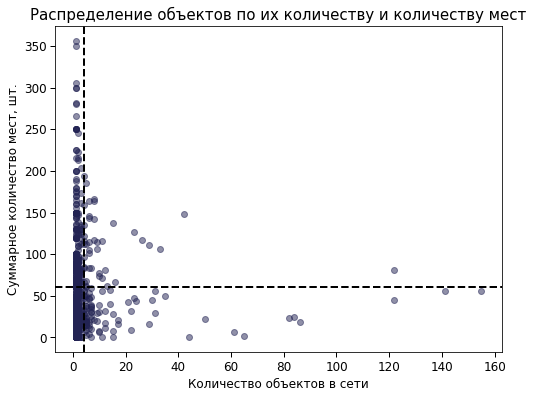

In [ ]:
# Строим график
plt.figure(figsize=(8, 6))
plt.scatter(x=statistics_for_objects['count_object'], y=statistics_for_objects['total_number'], alpha=0.5, color='#222353')

# Форматирование графика
plt.title('Распределение объектов по их количеству и количеству мест', fontsize=15)
plt.xlabel('Количество объектов в сети', fontsize=12)
plt.ylabel('Суммарное количество мест, шт.', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)


# Добавление осей для определения соотношения
plt.axvline(x=statistics_for_objects['count_object'].mean(), color='black', linestyle='--',  linewidth=2)
plt.axhline(y=statistics_for_objects['total_number'].mean(), color='black', linestyle='--',  linewidth=2)

# Ограничие по осям для информативного графика
# plt.axis([0, 40, 0, 500])

# Вывод
plt.show()

**Вывод**
***
Исходя из графика следует сделать вывод о том, что для сетевых объектов характерно небольшое количество завдений в сети с небольшим количеством посадочных мест. Об этом свидетелеьствует наибольшое количество точек в нижней, левой зоне.

**Определение типа объекта с самым большим количеством посадочных мест**

Построим график, на котором для каждого типа объекта будет отображено среднее количество посадочных мест.  Дополнительно отобьем среднее количество посадочных мест для всех объектов.

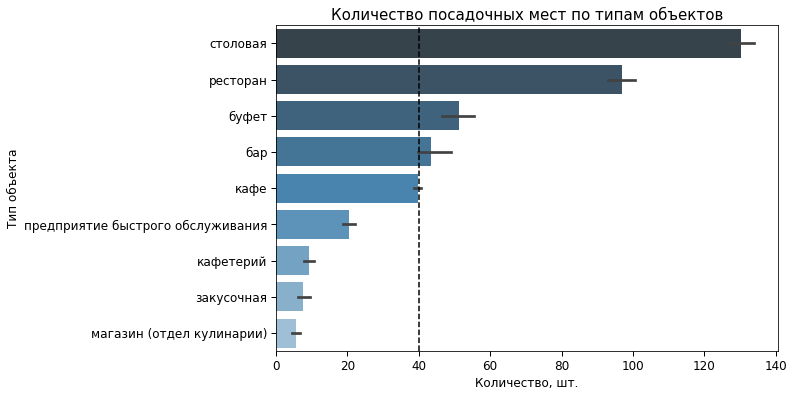

In [ ]:
# Производим сортировку
sort_object = df_rest_data.groupby('object_type')['number'].mean().sort_values(ascending=False).index

# Рисуем график
plt.figure(figsize=(9,6))
sns.barplot(y='object_type', x='number', data=df_rest_data, order=sort_object, palette='Blues_d')
plt.title('Количество посадочных мест по типам объектов', fontsize=15)
plt.ylabel('Тип объекта', fontsize=12)
plt.xlabel('Количество, шт.', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)
plt.axvline(x=df_rest_data['number'].median(), color='black', linestyle='--')
plt.show()

**Вывод**
***
Средне количество посадочных мест для всех объектов составляет 40 штук.
Большая половина объектов, имеют количество посадочных мест выше среднего.  
Сюда мы относим:
- **Столовая** в среднем имеет самое большое количество посадочных мест - 130, это в 3 раза больше среднего количества посадочных мест.
-  **Ресторан** - 100 посадочных мест, что выше срденего в 2.5 раза
- **Буфет**, **Бар**, **Кафе** - наиболее близки к среднему количеству посадочных мест.

4 типа объекта ниже среднего в 2 раза, сюда вошли:  
- Предприятие быстрого обслуживания, 
- Кафетерий
- Закучосная
- Магазин

**Топ-10 улиц по количеству объектов общественного питания**

Выделим слова, которые могут означать название улиц.  
Далее к адресу применим регулярное выражение.

In [ ]:
words = ['улица','ул', 'переулок','шоссе','проспект','площадь','проезд',
         'село','аллея','бульвар','набережная','тупик','линия', 'микрорайон',
         'квартал', 'деревня', 'посёлок', 'километр', 'территория', 'корпус']
 
str_pat = r".*,\s*\b([^,]*?(?:{})\b[^,]*)[,$]+".format("|".join(words))

In [ ]:
df_rest_data['street'] = df_rest_data['address'].str.extract(str_pat, flags=re.I)
df_rest_data.head()


,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица


Посмотрим, по всем-ли адресам получилось выделить название улиц.

In [ ]:
df_rest_data['street'].isna().sum()

188

Количество пропусков составило 188, что составляет 1% от числа всех объектов датасета. При удалении мы не полчим весомых влияний на результат. Удалим их.

In [ ]:
df_rest_data.dropna(inplace=True)
df_rest_data.reset_index(drop=True)

,id,object_name,chain,object_type,address,number,street
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
...,...,...,...,...,...,...,...
15173,208537,Шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
15174,209264,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
15175,209186,Шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
15176,221900,Шоколадница,да,кафе,"город Москва, поселение Московский, Киевское ш...",36,22-й километр


In [ ]:
df_rest_data['street'].isna().sum()

0

Пропусков нет, поехали дальше.

In [ ]:
count_objects_street = df_rest_data.groupby('street')['id'].count().reset_index().sort_values(by='id', ascending=False).head(10)

In [ ]:
count_objects_street.columns = ['street', 'n_objects']
count_objects_street

,street,n_objects
1517,проспект Мира,204
1044,Профсоюзная улица,179
719,Ленинградский проспект,171
1029,Пресненская набережная,167
434,Варшавское шоссе,160
722,Ленинский проспект,146
1513,проспект Вернадского,130
709,Кутузовский проспект,114
639,Кировоградская улица,109
1313,Ходынский бульвар,102


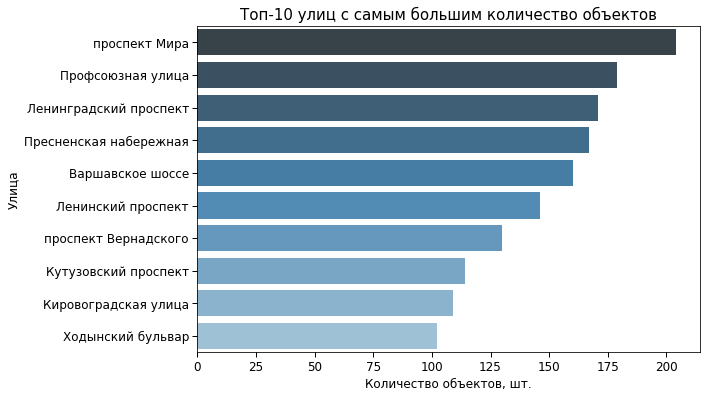

In [ ]:
# Рисуем график
plt.figure(figsize=(9,6))
sns.barplot(y='street', x='n_objects', data=count_objects_street, order=count_objects_street['street'], palette='Blues_d')
plt.title('Топ-10 улиц с самым большим количество объектов', fontsize=15)
plt.ylabel('Улица', fontsize=12)
plt.xlabel('Количество объектов, шт.', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)
plt.show()

**Вывод**
***
Самое большое количество объектов находится на проспекте Мира.  
Здесь размещено 232 заведения.  
На 2 и 3 месте Профсоюзная улица и Ленинградский проспект,  с 179 и 171 объектами соответственно.  
Из-за того что наши данные имеют пригороды, посмотрим на топ-10 районов.

**Районы Москвы по самому большому количеству объектов общественного питания**

Подтянем открытые данные правительства Москвы.

In [ ]:
count_objects_street = count_objects_street.merge(df_mosgaz_streets[['streetname', 'area']], left_on='street', right_on='streetname', how='left')
count_objects_street.head()

,street,n_objects,streetname,area
0,проспект Мира,204,проспект Мира,Алексеевский район
1,проспект Мира,204,проспект Мира,Ярославский Район
2,проспект Мира,204,проспект Мира,Район Марьина роща
3,проспект Мира,204,проспект Мира,Останкинский район
4,проспект Мира,204,проспект Мира,Район Ростокино


После объединения таблиц задублировался столбец с названиями улиц.  
Удалим его.

In [ ]:
count_objects_street.drop('streetname', axis=1, inplace=True)

**Вывод**
***
1. Некоторые районы, в которых находятся самое большое количество заведений:
    - Алексеевский район
    - Ярославский Район
    - Район Марьина роща
    - Останкинский район
    - Район Ростокино
    - Район Свиблово
    - Мещанский район
    - Академический район
    - Район Черемушки
    - Район Ясенево
    - Район Коньково
    - Обручевский район
    - Район Теплый Стан
    - Район Аэропорт
    - Район Беговой

**Районы Москвы по самому маленькому количеству объектов общественного питания**

In [ ]:
one_objects_street = df_rest_data.groupby('street')['id'].count().reset_index()
one_objects_street.columns = ['street', 'n_objects']

In [ ]:
# Выборка улиц с 1 объектом
one_objects_street = one_objects_street[one_objects_street['n_objects'] ==1]
# Проверка среза
one_objects_street['n_objects'].unique()

array([1])

Успех! Все выполнено верно.  
Теперь найдем количество улиц с 1 объектом

In [ ]:
print('Количество улиц с 1 объектом: {}'.format(len(one_objects_street)))
print('Доля улиц с 1 объектом от общего числа улиц: {:.0%}'.format((df_rest_data.groupby('street')['id'].count().reset_index()['id'] == 1).mean()))

Количество улиц с 1 объектом: 600
Доля улиц с 1 объектом от общего числа улиц: 30%


30% - достаточно большое количество улиц для того чтобы выйти на них с технологичным предложением и составить хорошую конкуренцию. Тем более когда у тебя всего 1 конкурент.  
Посмотрим на районы этих улиц.

In [ ]:
one_objects_street = one_objects_street.merge(df_mosgaz_streets[['streetname', 'area']], left_on='street', right_on='streetname', how='left')
one_objects_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 647 entries, 0 to 646
Data columns (total 4 columns):
street        647 non-null object
n_objects     647 non-null int64
streetname    565 non-null object
area          565 non-null object
dtypes: int64(1), object(3)
memory usage: 25.3+ KB


Отсутствует информация о районе по 22 улицам.  
Это всего 4% от общего числа улиц, удалим их.

In [ ]:
one_objects_street.dropna(inplace=True)
one_objects_street.reset_index(drop = True)
one_objects_street.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 565 entries, 0 to 646
Data columns (total 4 columns):
street        565 non-null object
n_objects     565 non-null int64
streetname    565 non-null object
area          565 non-null object
dtypes: int64(1), object(3)
memory usage: 22.1+ KB


In [ ]:
one_objects_street.groupby('area')['street'].count().sort_values(ascending=False).head(10)

area
Таганский район        26
Район Хамовники        26
Басманный район        25
Тверской район         20
Пресненский район      19
Район Марьина роща     18
Мещанский район        17
Район Арбат            17
Район Замоскворечье    14
Район Лефортово        12
Name: street, dtype: int64

**Вывод**
***
ТОП-10 районов, с улицами, на которых находится всего 1 объект:
- Таганский район
- Район Хамовники
- Басманный район
- Тверской район
- Пресненский район
- Район Марьина роща
- Мещанский район
- Район Арбат
- Район Замоскворечье
- Район Лефортово



**Распределение количества мест для улиц с большим количеством объектов**

Сделаем срез данных основного датасета по улицам где больше всего объектов

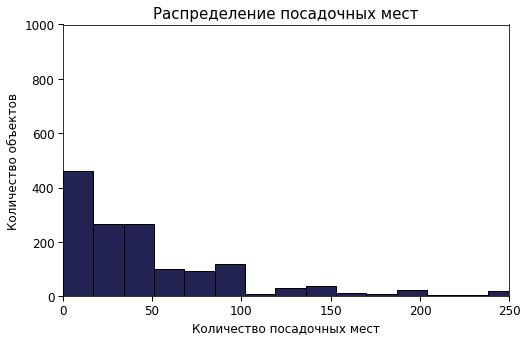

In [ ]:
# Рисуем график
plt.figure(figsize=(8,5))
plt.hist(df_rest_data[df_rest_data['street'].isin(count_objects_street['street'])]['number'], bins=100, color='#222353', ec='black')

# Дополняем подписями, выполняем форматирование осей
plt.title('Распределение посадочных мест', fontsize=15)
plt.xlabel('Количество посадочных мест', fontsize=12)
plt.ylabel('Количество объектов', fontsize=12)
plt.tick_params(axis = 'both', which = 'major', length = 5, width = 1, labelsize = 12)

# Ограничие по осям для информативного графика
plt.axis([0, 250, 0, 1000])

# Вывод
plt.show()

**Вывод**
***
На улицах с большим количеством заведений характрено либо отсутствие посадочных мест, либо их количество ниже среднего, т.е. менее 50 шт.  
Также наблюдается закономернсть - чем меньше количество объектов на улице, тем больше количество посадочных мест.

<a id='fin'></a>
## Общий вывод
***
По итогам проведенного исследования рынка общественного питания в Москве, следует, что наиболее востребованный тип заведения - **"Кафе"**.  
Именно этот тип объекта мы рекомендуем к выбору для рассматриваемого проекта.

Почему кафе ?
1. Этот тип имеют **40%** всех возможных заведений в городе.
2. Для кафе возможно развитие сети. Это важно, потому как не каждое заведение является сетевым.  
Сеть - это небольшое количество заведений в составе сети, до 4, с небольшим количеством посадочных мест, до 60 шт.;
На исследуемых данных, доля сетевых заведений с типом "Кафе" составила **23%.**
3. Характерное число посадочных мест для этого типа составляет **40 шт.**  
Это подходит для идеи проекта - обслуживание работами.  
Улицы, с наибольшим количеством заведений, в среденем имеют аналогичное количество мест.
    - Из плюсов - раз здесь большое количество заведений, значит на этих улицах большая концентрация клиентов.
    - Из минусов - высокая конкуренция, нужно завладеть рынком.  
    
Это районы:
***
- Алексеевский район
- Ярославский Район
- Район Марьина роща
- Останкинский район
- Район Ростокино
- Район Свиблово
- Мещанский район
- Академический район
- Район Черемушки
- Район Ясенево
- Район Коньково
- Обручевский район
- Район Теплый Стан
- Район Аэропорт
- Район Беговой
4. Рекомендуется рассмотреть размещение заведений в нижеуказанных районах. На их некоторых улицах находятся по 1 заведению.  
Доля таких улиц составляет 30% из числа всех улиц города.  
Это достаточно большое количество, чтобы выйти на них с технологичным предложением и составить хорошую конкуренцию.  
Тем более когда у тебя всего 1 конкурент.  
ТОП-10 районов, с улицами, на которых находится всего 1 объект:
***
- Таганский район
- Район Хамовники
- Басманный район
- Тверской район
- Пресненский район
- Район Марьина роща
- Мещанский район
- Район Арбат
- Район Замоскворечье
- Район Лефортово





<a id='presentation'></a>
## Презентация
***
[Презентация исследования рынка общественного питания в Москве](https://drive.google.com/file/d/15PGoxXKzbyJ6-F3luUiiB-SbJssCRnYo/view?usp=sharing)